# Find Chemical Potential that Produces Some Average Gamma

The linker length distribution is highly dependent on the binding state of the system. The binding state of the system is highly dependent on the chemical potential. Search for a chemical potential that produces a linker length distribution with a desired average gamma value.

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc
from sliding_nucleosome import mc

#### Initialize Physical Parameters

In [3]:
# Specify physical parameters
J = np.atleast_2d([-3.92])
B = np.atleast_2d([-1.5])
mu = np.array([-9.7])

In [4]:
# Generate a methylation sequence
n_beads = 2000
frac_methyl = 0.1
methyl_corr_length = 18.4
marks = nuc.gen_meth(n_beads, frac_methyl, methyl_corr_length)
marks = np.atleast_2d(marks).T

In [5]:
# Specify the polymer
gamma = np.ones(marks.shape[0])
nbi = np.array([2])
linker_corr_length = 45
a = int(np.floor(15.1))
lam = -np.log(1 - 1 / linker_corr_length)

# Initialize linker lengths
linker_lengths = np.random.exponential(linker_corr_length, size=marks.shape[0])
linker_lengths = np.maximum(linker_lengths, 1.0)
linker_lengths = linker_lengths.astype(int)

In [6]:
print(f"Linker Lengths: \n\n{linker_lengths}")

Linker Lengths: 

[ 33  46   4 ...   1 108 167]


#### Initialize the Nucleosome Array

In [7]:
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = mu,
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

In [8]:
print(f"Average Gamma: {np.average(nuc_arr.gamma)}")

Average Gamma: 0.287


#### Specify Parameters for Linker Simulation

In [9]:
n_snap = 1
n_steps_per_snap = 40000

#### Perform a Binary Search to Find Chemical Potential that Produces Desired Average Gamma

In [10]:
target_avg_gamma = 0.5
mu_lower = -9.5
mu_upper = -8.5
rtol = 0.05

mu = mc.find_mu_for_avg_gamma(
    nuc_arr,
    linker_corr_length,
    mu_lower,
    mu_upper,
    target_avg_gamma,
    n_snap,
    n_steps_per_snap,
    rtol=rtol
)

Iteration 1 of 100
Mu: -9.0, Avg. Gamma: 0.4
Iteration 2 of 100
Mu: -8.75, Avg. Gamma: 0.599
Iteration 3 of 100
Mu: -8.875, Avg. Gamma: 0.426
Iteration 4 of 100
Mu: -8.8125, Avg. Gamma: 0.488
Converged!


#### Model the Chromatin Fiber at the Desired Average Gamma

In [11]:
print(f"Mu for Desired Gamma: {mu}")

# Initialize nucleosome array
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = [mu],
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

# Simulate linker lengths
nuc_arr = mc.mc_linkers(nuc_arr, n_snap, n_steps_per_snap)
linker_lengths = nuc_arr.linker_lengths

Mu for Desired Gamma: -8.8125


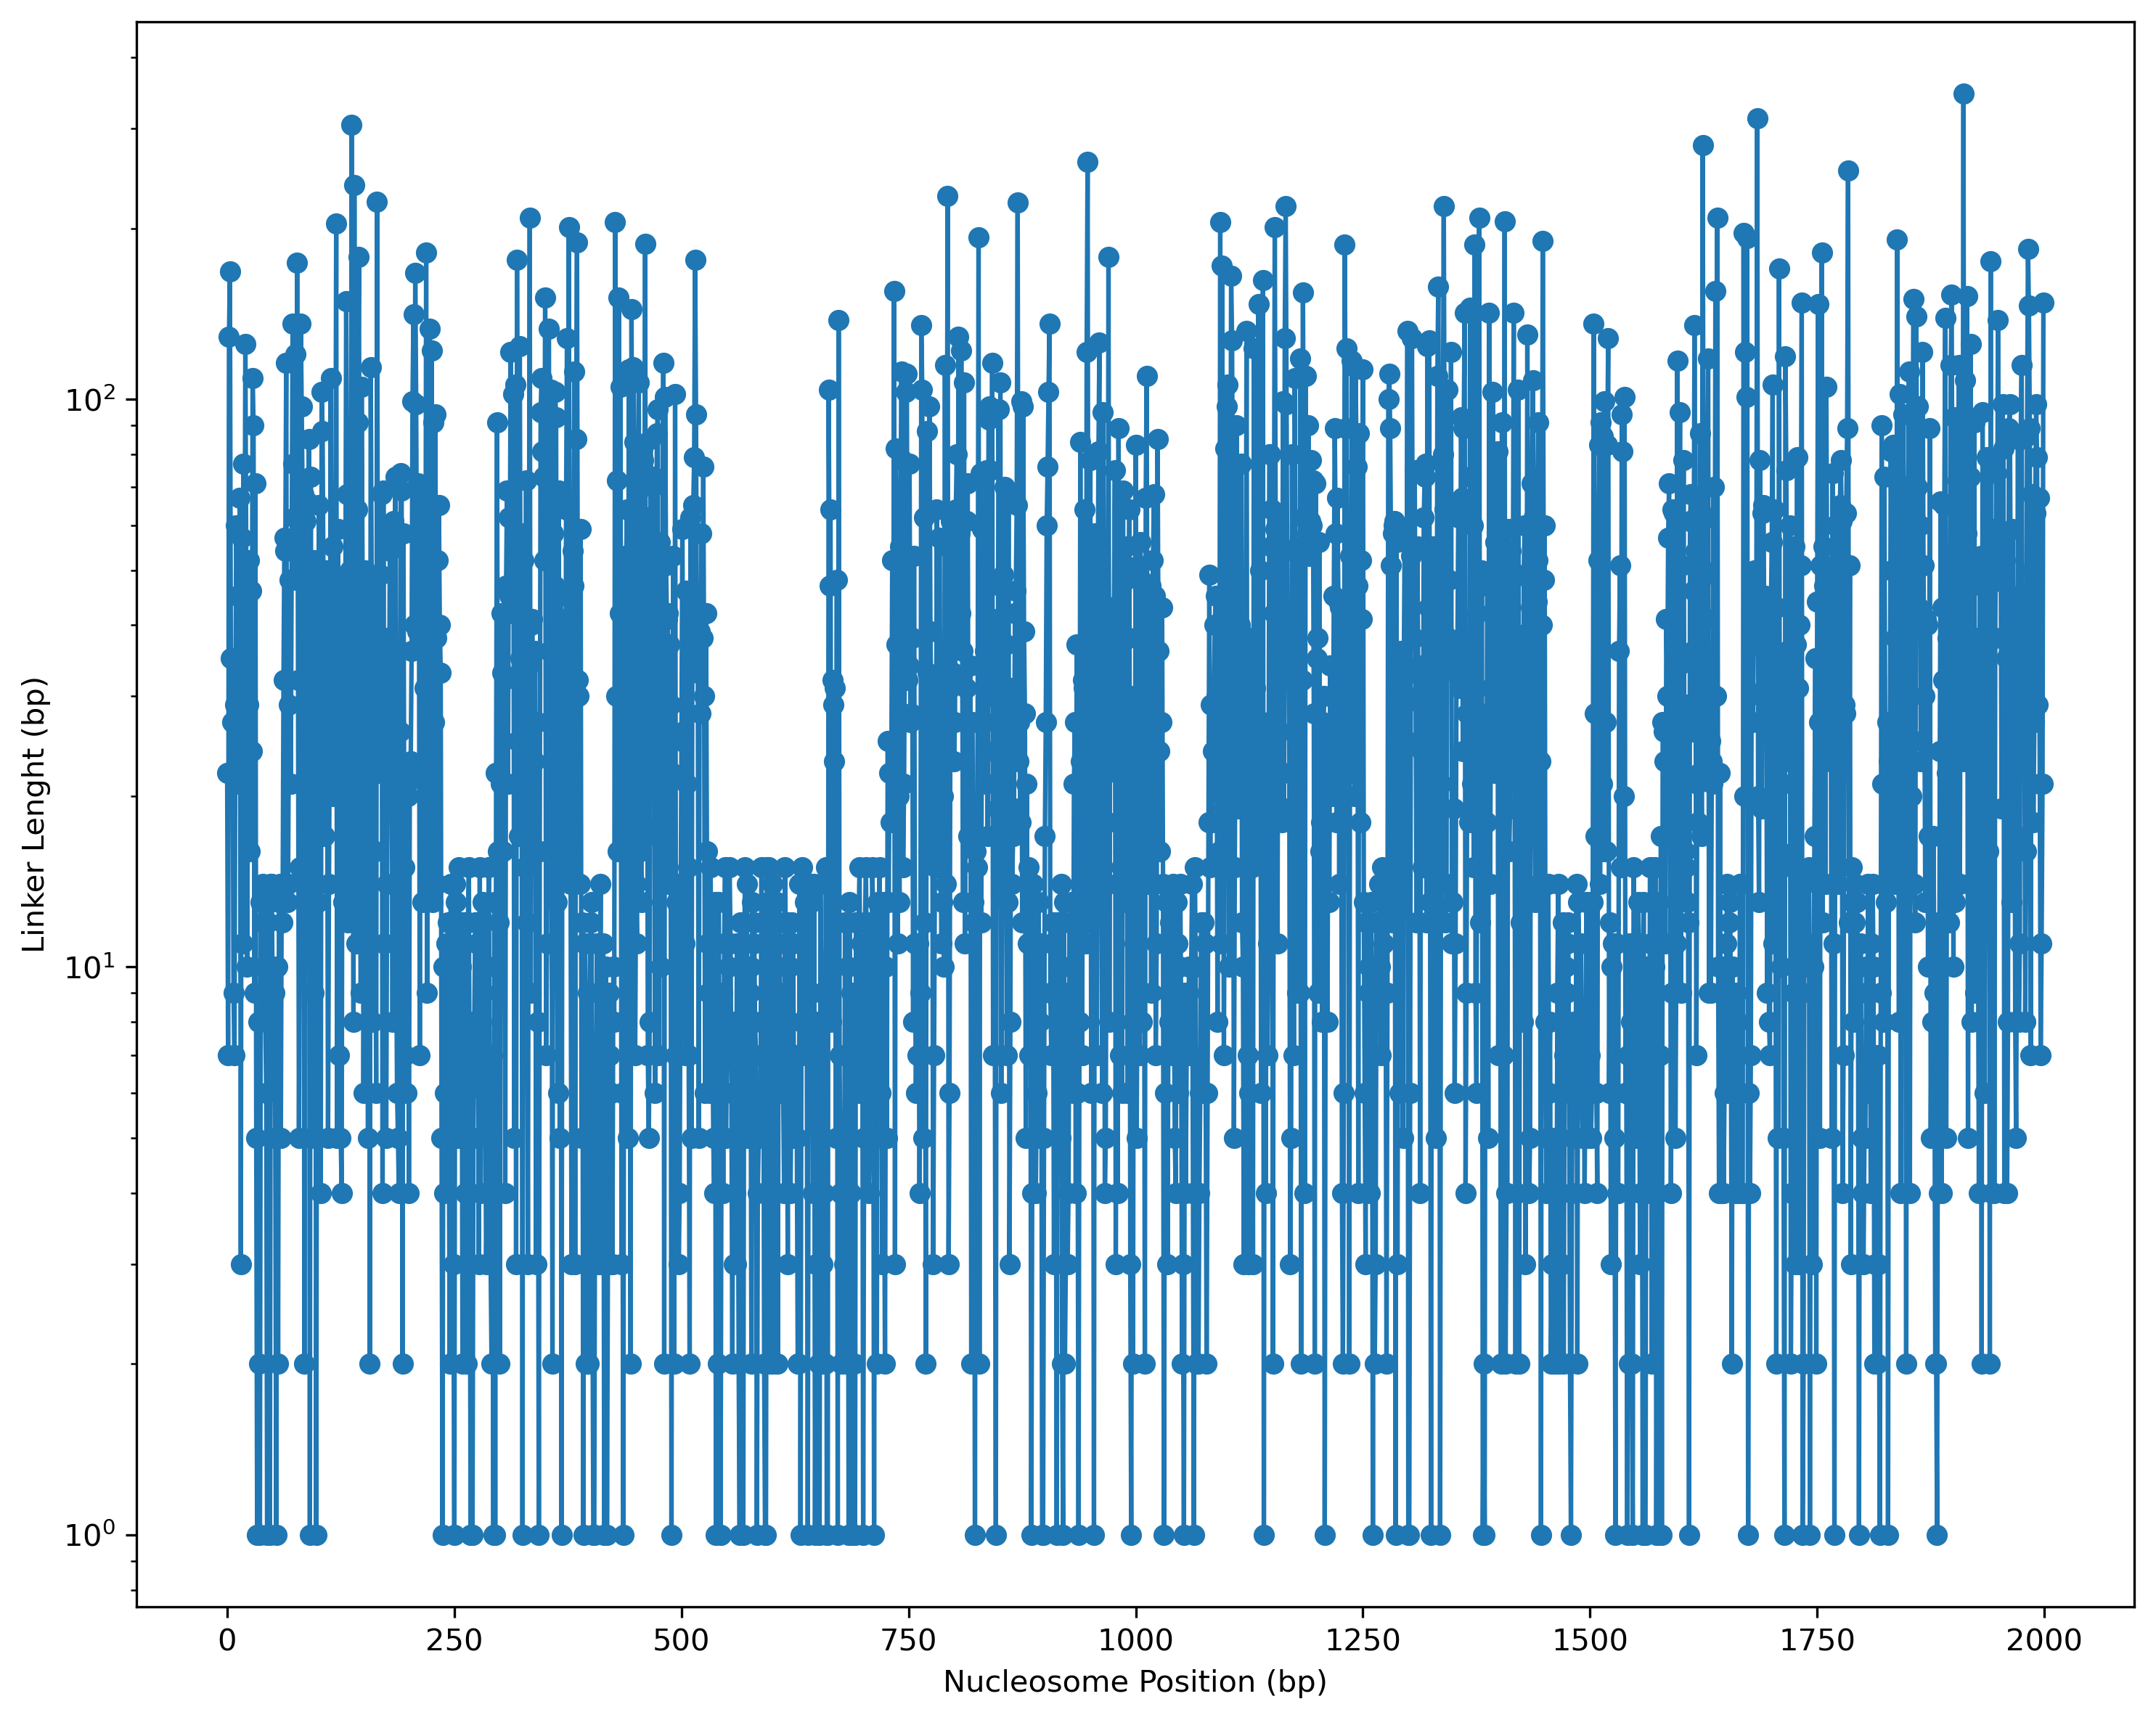

In [12]:
# Plot linker length profile
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(linker_lengths, 'o-')
plt.yscale('log')
plt.xlabel("Nucleosome Position (bp)")
plt.ylabel("Linker Lenght (bp)")
plt.tight_layout()
plt.show()